In [1]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/0518_data.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,2,경기도,평택시,125.0,21.0,4,PSCI거더교,B,DB-24,37,5,25.0,21443.0
1,풍계교,3,경기도,이천시,55.0,20.0,2,RC슬래브교,B,DB-24,27,4,15.0,5654.0
2,태평교,3,경기도,여주시,43.8,19.5,4,PSCI거더교,B,DB-24,32,2,21.9,8750.0
3,장평교,2,경기도,이천시,105.0,19.5,4,RC슬래브교,B,DB-24,30,7,15.0,14150.0
4,덕평교,3,경기도,여주시,32.0,10.0,2,RC슬래브교,B,DB-24,27,2,16.0,3739.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5680 non-null   object 
 1   시설물종별등급구분  5680 non-null   object 
 2   시도         5680 non-null   object 
 3   시군구        5680 non-null   object 
 4   교량연장       5680 non-null   float64
 5   교량폭        5680 non-null   float64
 6   차로수        5680 non-null   int64  
 7   상부구조형식     5680 non-null   object 
 8   최종안전점검결과   5680 non-null   object 
 9   설계활하중      5680 non-null   object 
 10  준공후경과년수    5680 non-null   int64  
 11  경간수        5680 non-null   int64  
 12  최대경간장      5680 non-null   float64
 13  교통량        5680 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 621.4+ KB


In [4]:
def encode_features(df):
    features = ['시설물종별등급구분', '최종안전점검결과', '상부구조형식', '설계활하중']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [5]:
bridge_df = encode_features(df)
bridge_df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,1,경기도,평택시,125.0,21.0,4,0,1,2,37,5,25.0,21443.0
1,풍계교,2,경기도,이천시,55.0,20.0,2,6,1,2,27,4,15.0,5654.0
2,태평교,2,경기도,여주시,43.8,19.5,4,0,1,2,32,2,21.9,8750.0
3,장평교,1,경기도,이천시,105.0,19.5,4,6,1,2,30,7,15.0,14150.0
4,덕평교,2,경기도,여주시,32.0,10.0,2,6,1,2,27,2,16.0,3739.0


## 불필요 컬럼 삭제

In [6]:
# 필요없는 변수 제외(교량명, 시군구, 위도, 경도 등)
bridge_df = df.drop(['교량명', '시도', '시군구'], axis = 1)
bridge_df.head()

,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,1,125.0,21.0,4,0,1,2,37,5,25.0,21443.0
1,2,55.0,20.0,2,6,1,2,27,4,15.0,5654.0
2,2,43.8,19.5,4,0,1,2,32,2,21.9,8750.0
3,1,105.0,19.5,4,6,1,2,30,7,15.0,14150.0
4,2,32.0,10.0,2,6,1,2,27,2,16.0,3739.0


## 데이터 모델링

In [7]:
y_bridge_df = bridge_df['최종안전점검결과']
X_bridge_df = bridge_df.drop(['최종안전점검결과'], axis = 1)

In [8]:
X_bridge_df.shape

(5680, 10)

In [9]:
y_bridge_df.shape

(5680,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_bridge_df, y_bridge_df, test_size = 0.3, random_state = 12)

In [11]:
# 랜덤포레스트
rf_clf = RandomForestClassifier(random_state = 12)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.3f}'.format(accuracy))

랜덤 포레스트 정확도: 0.875


## 모델링 트리 시각화

In [12]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# 첫번째 결정 트리 추출
tree = rf_clf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns,
                           filled=True, rounded=True, impurity=  True, special_characters=True, fontname='NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.format = 'pdf'
graph.render("randomforest_tree")

'randomforest_tree.pdf'

In [13]:
graph.format = 'png'
graph.render("randomforest_tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.999116 to fit


'randomforest_tree.png'

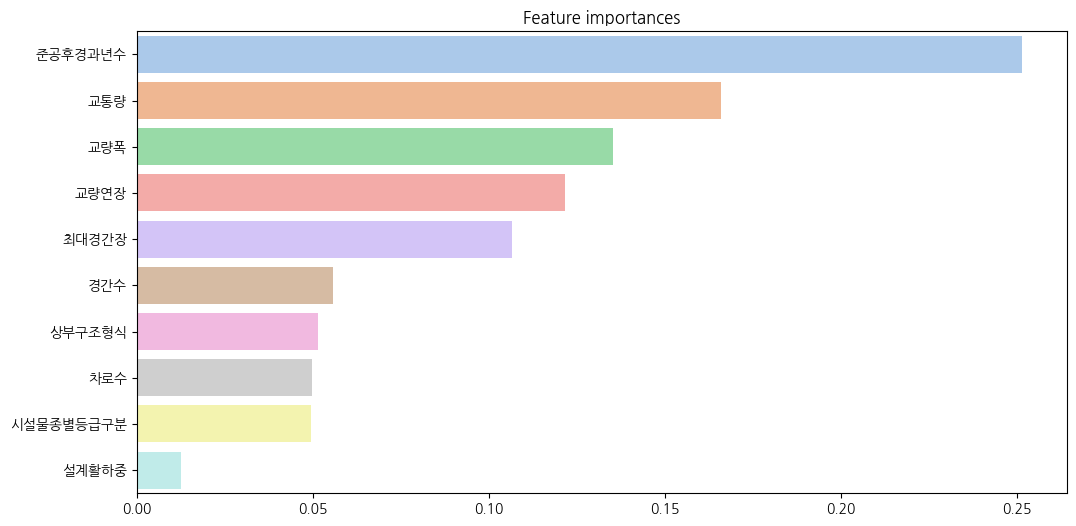

In [14]:
# 중요요인 시각화
ftr_importances_values = rf_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending = False)
plt.figure(figsize = (12, 6))
plt.title('Feature importances')
sns.barplot(x = ftr_top, y = ftr_top.index,  palette = 'pastel')
plt.show()

* 전체모델에서 중요도는 의사결정트리와 비교했을때 교량연장과 최대경간장, 경간수와 시설물종별등급구분의 순서를 제외하곤 동일하다.

## 교차검증

In [15]:
# cross_val_score()
scores = cross_val_score(rf_clf, X_bridge_df, y_bridge_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7967
교차 검증 1 정확도: 0.7298
교차 검증 2 정확도: 0.6928
교차 검증 3 정확도: 0.7852
교차 검증 4 정확도: 0.8019
평균 정확도: 0.7613


## 최적의 하이퍼파라미터 찾기

In [16]:
# GridSearchCV를 이용한 하이퍼 파라미터 튜닝
# 파라미터의 범위를 0~9까지로 제한(과적합 방지 위해)
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [i for i in range(10)], 
    'min_samples_leaf' : [i for i in range(10)],
    'min_samples_split' : [i for i in range(10)],
}
# n_jobs = -1 추가 시, 모든 CPU 코어 사용
grid_cv = GridSearchCV(rf_clf , param_grid = params, scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 예측 정확도: 0.8541
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}


## 최적의 모델 적용

In [17]:
rf_clf = RandomForestClassifier(random_state = 12, n_estimators = 10, max_depth = 9, min_samples_leaf = 2, min_samples_split = 6)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.3f}'.format(accuracy))

랜덤 포레스트 정확도: 0.863


In [18]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# 첫번째 결정 트리 추출
tree = rf_clf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns,
                           filled=True, rounded=True, impurity=  True, special_characters=True, fontname='NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.format = 'pdf'
graph.render("randomforest_tree1")

'randomforest_tree1.pdf'

In [19]:
graph.format = 'png'
graph.render("randomforest_tree1")

'randomforest_tree1.png'

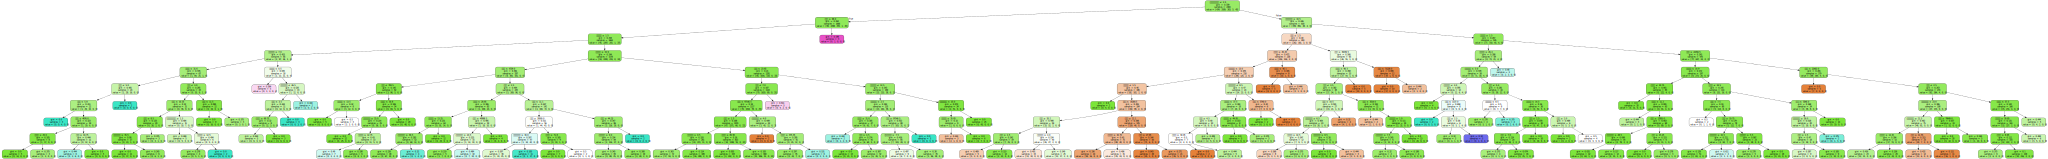

In [20]:
graph

## 랜덤포레스트 트리맵 간단 해석

* 의사결정트리와 동일하게 주황색이 A, 초록색이 B, 민트색이 C, 파란색(보라계열)이 D, 핑크색이 E로 분류되는 것으로 추측
* 의사결정트리와 비교했을때 전체적인 모델링과 모델별 최적의 하이퍼파라미터를 넣고 모델링했을때, 랜덤포레스트의 정확도가 의사결정트리보다 모두 높았다.
* 트리맵 또한 최적의 하이퍼파라미터를 넣은 상태에서 시각화를 했을때 D등급과 E등급의 분류가 보다 뚜렷하게 되어있다

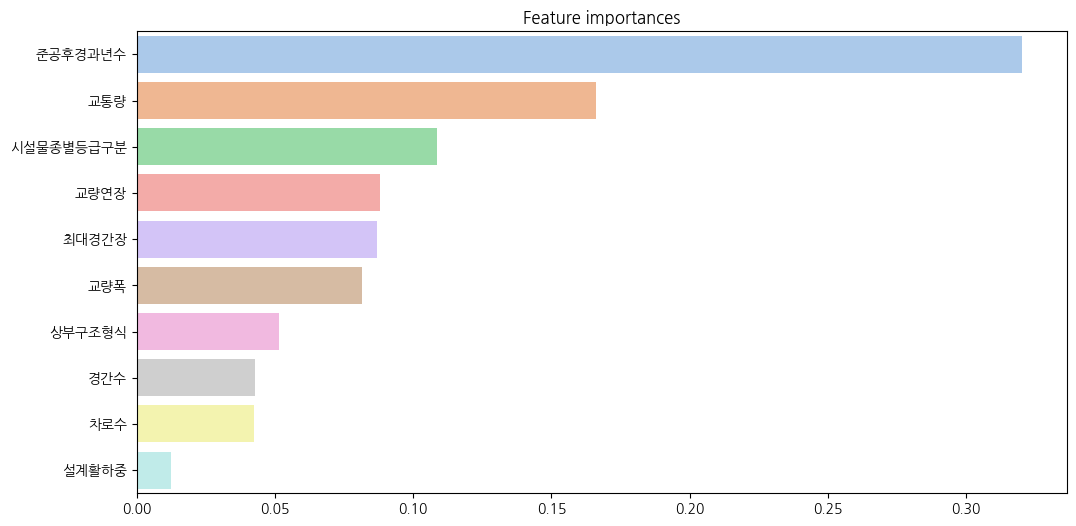

In [21]:
# 중요요인 시각화
ftr_importances_values = rf_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending = False)
plt.figure(figsize = (12, 6))
plt.title('Feature importances')
sns.barplot(x = ftr_top, y = ftr_top.index,  palette = 'pastel')
plt.show()

* 모델마다 중요한 피처요인으로 선정하는게 조금씩 다르다.
* 의사결정트리의 경우 준공후 경과년수, 시설물종별등급, 교통량, 교량연장, 교량폭, 최대경간장, 경간수, 상부구조형식, 설계활하중, 차로수
* 랜덤포레스트의 경우 준공후 경과년수, 교통량, 교량폭, 교량연장, 최대경간장, 시설물종별등급구분, 경간수, 상부구조형식, 차로수, 설계활하중